In [ ]:
import pandas as pd
import numpy as np
# Load the marketing  dataset
df=pd.read_csv('./sample_data/AusApparalSales4thQrt2020.csv')

In [ ]:
print(df.head())
print(df.describe())
print(df.info())
# Check for duplicate rows
print("\n Check for  duplucated values")
duplicates = df[df.duplicated()]
print(duplicates)

missing_values = df.isna().sum()
print("\n Missing Values per Column ")
missing_summary = missing_values[missing_values > 0]
print(missing_summary)
print(df.isna().sum())
grp =df.groupby('Group')['Sales'].sum()
print(grp)
from sklearn.preprocessing import MinMaxScaler

# Scaling numeric features using min-max scaling
scaler = MinMaxScaler()
df[['normalized_unit', 'normalized_sales']] = scaler.fit_transform(df[['Unit', 'Sales']])

print(df.head())

# Aggregate total sales and units sold by 'State' and 'Group'
aggregated = df.groupby(['State', 'Group']).agg({'Sales': 'sum', 'Unit': 'sum'}).reset_index()
print(aggregated)
# Merge back with the original data if needed
merged_data = pd.merge(df, aggregated, on=['State', 'Group'], suffixes=('', '_total'))
print(merged_data.head(100))
df_aggregated_sales = df.groupby(['State','Group']).agg({
    'normalized_sales': ['mean', 'median', 'min', 'max', 'sum', 'std', 'var', 'count']
})
df_aggregated_unit = df.groupby(['State','Group']).agg({
    'normalized_unit': ['mean', 'median', 'min', 'max', 'sum', 'std', 'var', 'count']
})

print(df_aggregated_sales)
print(df_aggregated_unit)


         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500
              Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000000   35000.000000
75%      26.000000   65000.000000
max      65.000000  162500.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   S

In [ ]:
group_sales = df.groupby('Group')['normalized_sales'].sum()
print(group_sales.head())
# Identify the group with the highest and lowest sales
highest_sales_group = group_sales.idxmax()
lowest_sales_group = group_sales.idxmin()

highest_sales_value = group_sales.max()
lowest_sales_value = group_sales.min()

# Display the results
print(f"Group with the highest sales: {highest_sales_group} ({highest_sales_value})")
print(f"Group with the lowest sales: {lowest_sales_group} ({lowest_sales_value})")



Group
Kids       480.142857
Men        484.444444
Seniors    473.571429
Women      482.492063
Name: normalized_sales, dtype: float64
Group with the highest sales:  Men (484.44444444444446)
Group with the lowest sales:  Seniors (473.57142857142856)


In [ ]:
# Load the dataset (assuming 'data' is already loaded)
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')

# Add a 'Week', 'Month', and 'Quarter' column for grouping
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# Function to generate report
def generate_report(group_by_column):
    grouped_data = df.groupby(group_by_column).agg({
        'Sales': ['sum', 'mean', 'max', 'min', 'std'],
        'Unit': ['sum', 'mean', 'max', 'min', 'std']
    })
    grouped_data.columns = ['_'.join(col) for col in grouped_data.columns]  # Flatten column names
    return grouped_data.reset_index()

# Generate weekly, monthly, and quarterly reports
weekly_report = generate_report('Week')
monthly_report = generate_report('Month')
quarterly_report = generate_report('Quarter')

# Display reports
print("Weekly Report:")
print(weekly_report)

print("\nMonthly Report:")
print(monthly_report)

print("\nQuarterly Report:")
print(quarterly_report)

Weekly Report:
    Week  Sales_sum    Sales_mean  Sales_max  Sales_min     Sales_std  \
0     40   15045000  44776.785714     125000       7500  29293.076913   
1     41   27002500  45922.619048     125000       7500  29930.519460   
2     42   26640000  45306.122449     125000       7500  29928.788223   
3     43   26815000  45603.741497     125000       7500  29851.225988   
4     44   21807500  43268.849206     125000       5000  29887.407035   
5     45   20865000  35484.693878     112500       5000  27074.865046   
6     46   21172500  36007.653061     112500       5000  27243.357678   
7     47   21112500  35905.612245     112500       5000  27553.541234   
8     48   21477500  36526.360544     112500       5000  27787.488802   
9     49   29622500  50378.401361     162500       5000  34589.575974   
10    50   31525000  53613.945578     162500      12500  36541.157063   
11    51   31655000  53835.034014     162500      12500  36206.440040   
12    52   31770000  54030.612245   

In [ ]:
import matplotlib.pyplot as plt

# Ensure the 'Sales' column is numeric
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Group the data by 'State' and 'Group' to calculate total sales
state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()

# Pivot the data for a better visual representation
state_group_sales_pivot = state_group_sales.pivot(index='State', columns='Group', values='Sales')

# Fill NaN values with 0 for better readability
state_group_sales_pivot = state_group_sales_pivot.fillna(0)

# Display the result
print(state_group_sales_pivot)

# Plotting state-wise sales for demographic groups
state_group_sales_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Add chart title and labels
plt.title('State-wise Sales Analysis by Demographic Groups', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Demographic Group', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt







# Display the pivot table
print(state_group_sales_pivot.isna().sum())

# Plotting the data as a grouped bar chart
state_group_sales_pivot.T.plot(kind='bar', figsize=(12, 6), colormap='tab10')

# Add chart title and labels
plt.title('Group-wise Sales Analysis Across States', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Demographic Group', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y %H:%M:%S', errors='coerce')

# Extract the hour of the day
df['Hour'] = df['Date'].dt.hour

# Group the data by hour and calculate total sales
hourly_sales = df.groupby('Hour')['Sales'].sum().reset_index()

print('Hourly sales........')
hourly_sales = df.groupby('Hour')['Sales'].sum().reset_index()
print(hourly_sales)
# Identify peak and off-peak hours
peak_hour = hourly_sales.loc[hourly_sales['Sales'].idxmax()]
off_peak_hour = hourly_sales.loc[hourly_sales['Sales'].idxmin()]

# Display peak and off-peak hours
print(f"Peak Hour: {peak_hour['Hour']} with sales of {peak_hour['Sales']}")
print(f"Off-Peak Hour: {off_peak_hour['Hour']} with sales of {off_peak_hour['Sales']}")

# Plot hourly sales for visualization
plt.figure(figsize=(12, 6))
plt.plot(hourly_sales['Hour'], hourly_sales['Sales'], marker='o', linestyle='-', color='blue', label='Sales')
plt.axvline(x=peak_hour['Hour'], color='green', linestyle='--', label='Peak Hour')
plt.axvline(x=off_peak_hour['Hour'], color='red', linestyle='--', label='Off-Peak Hour')

# Add labels and title
plt.title('Time-of-the-Day Sales Analysis', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(range(0, 24))
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y %H:%M:%S', errors='coerce')

# Extract relevant time periods
df['Day'] = df['Date'].dt.date


# Calculate aggregated sales
daily_sales = df.groupby('Day')['Sales'].sum().reset_index()
weekly_sales = df.groupby('Week')['Sales'].sum().reset_index()
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
quarterly_sales = df.groupby('Quarter')['Sales'].sum().reset_index()

# Create subplots for the dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Daily Sales
axes[0, 0].plot(daily_sales['Day'], daily_sales['Sales'], color='blue', marker='o')
axes[0, 0].set_title('Daily Sales', fontsize=14)
axes[0, 0].set_xlabel('Date', fontsize=12)
axes[0, 0].set_ylabel('Total Sales', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# Weekly Sales
axes[0, 1].bar(weekly_sales['Week'], weekly_sales['Sales'], color='green')
axes[0, 1].set_title('Weekly Sales', fontsize=14)
axes[0, 1].set_xlabel('Week', fontsize=12)
axes[0, 1].set_ylabel('Total Sales', fontsize=12)

# Monthly Sales
axes[1, 0].bar(monthly_sales['Month'], monthly_sales['Sales'], color='purple')
axes[1, 0].set_title('Monthly Sales', fontsize=14)
axes[1, 0].set_xlabel('Month', fontsize=12)
axes[1, 0].set_ylabel('Total Sales', fontsize=12)

# Quarterly Sales
axes[1, 1].bar(quarterly_sales['Quarter'], quarterly_sales['Sales'], color='orange')
axes[1, 1].set_title('Quarterly Sales', fontsize=14)
axes[1, 1].set_xlabel('Quarter', fontsize=12)
axes[1, 1].set_ylabel('Total Sales', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the dashboard
plt.show()


         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500
              Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000000   35000.000000
75%      26.000000   65000.000000
max      65.000000  162500.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   S

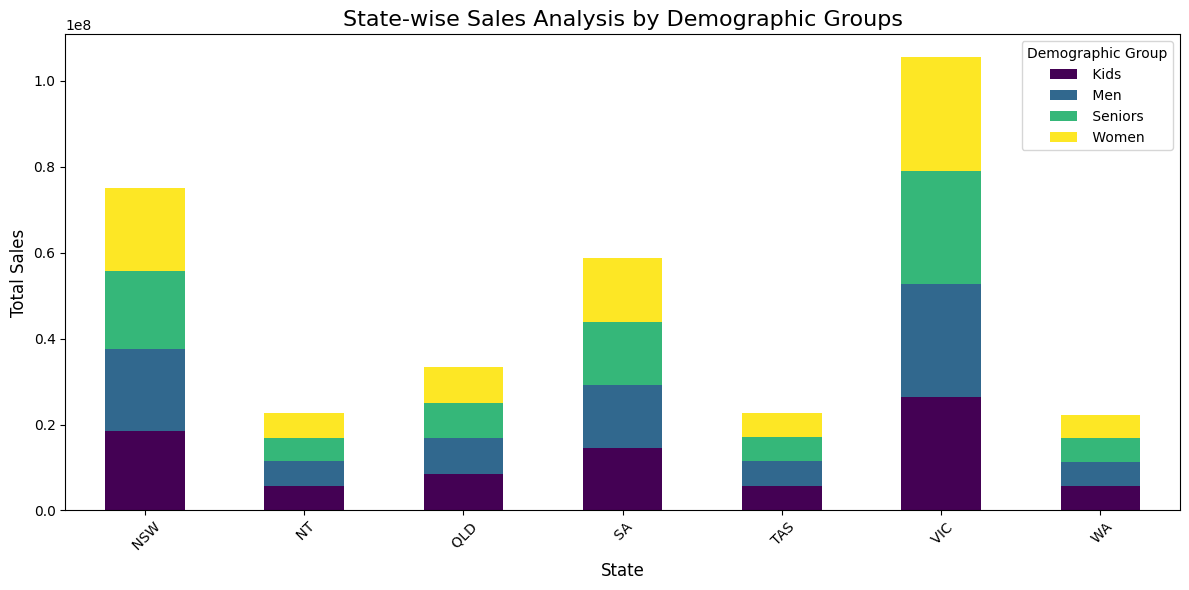

Group
Kids       0
Men        0
Seniors    0
Women      0
dtype: int64


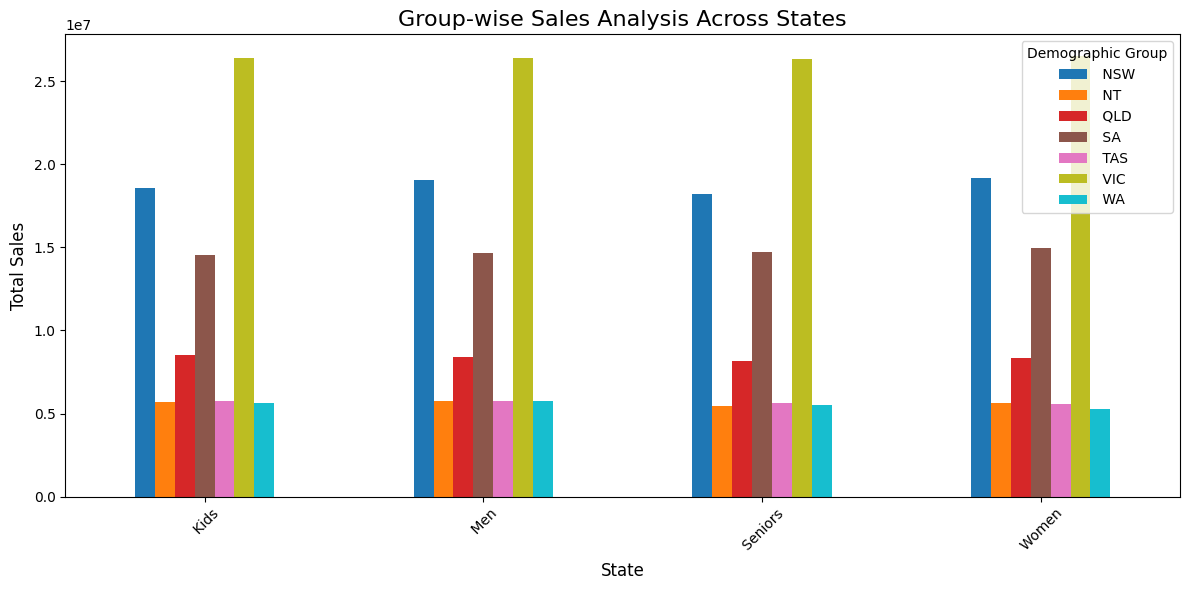

Hourly sales........
   Hour      Sales
0     0  340302500
Peak Hour: 0 with sales of 340302500
Off-Peak Hour: 0 with sales of 340302500


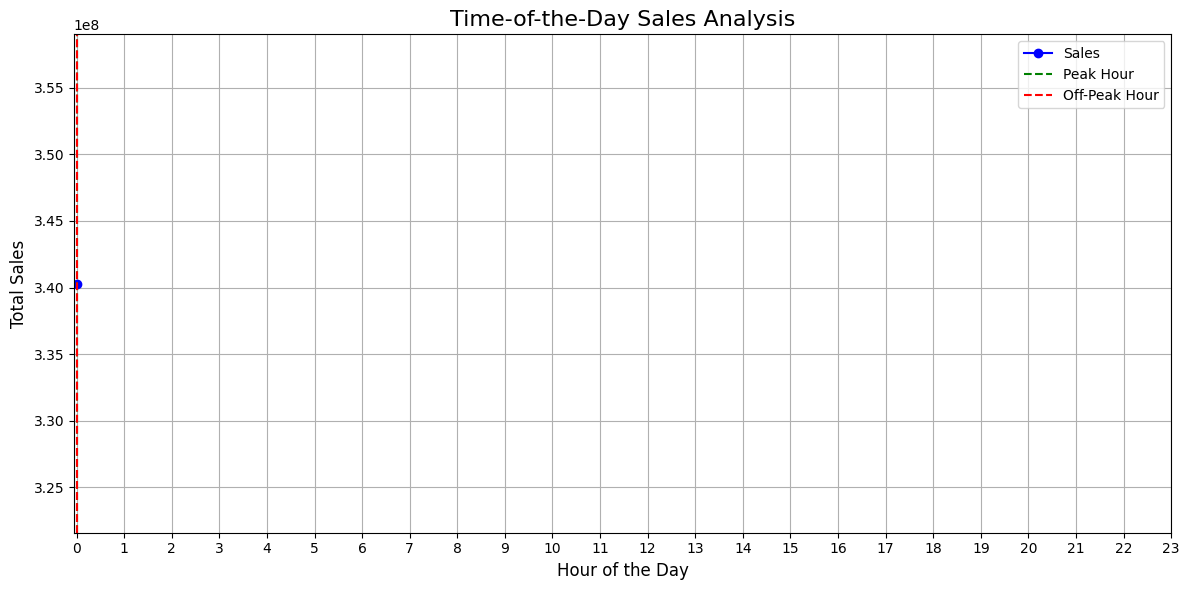

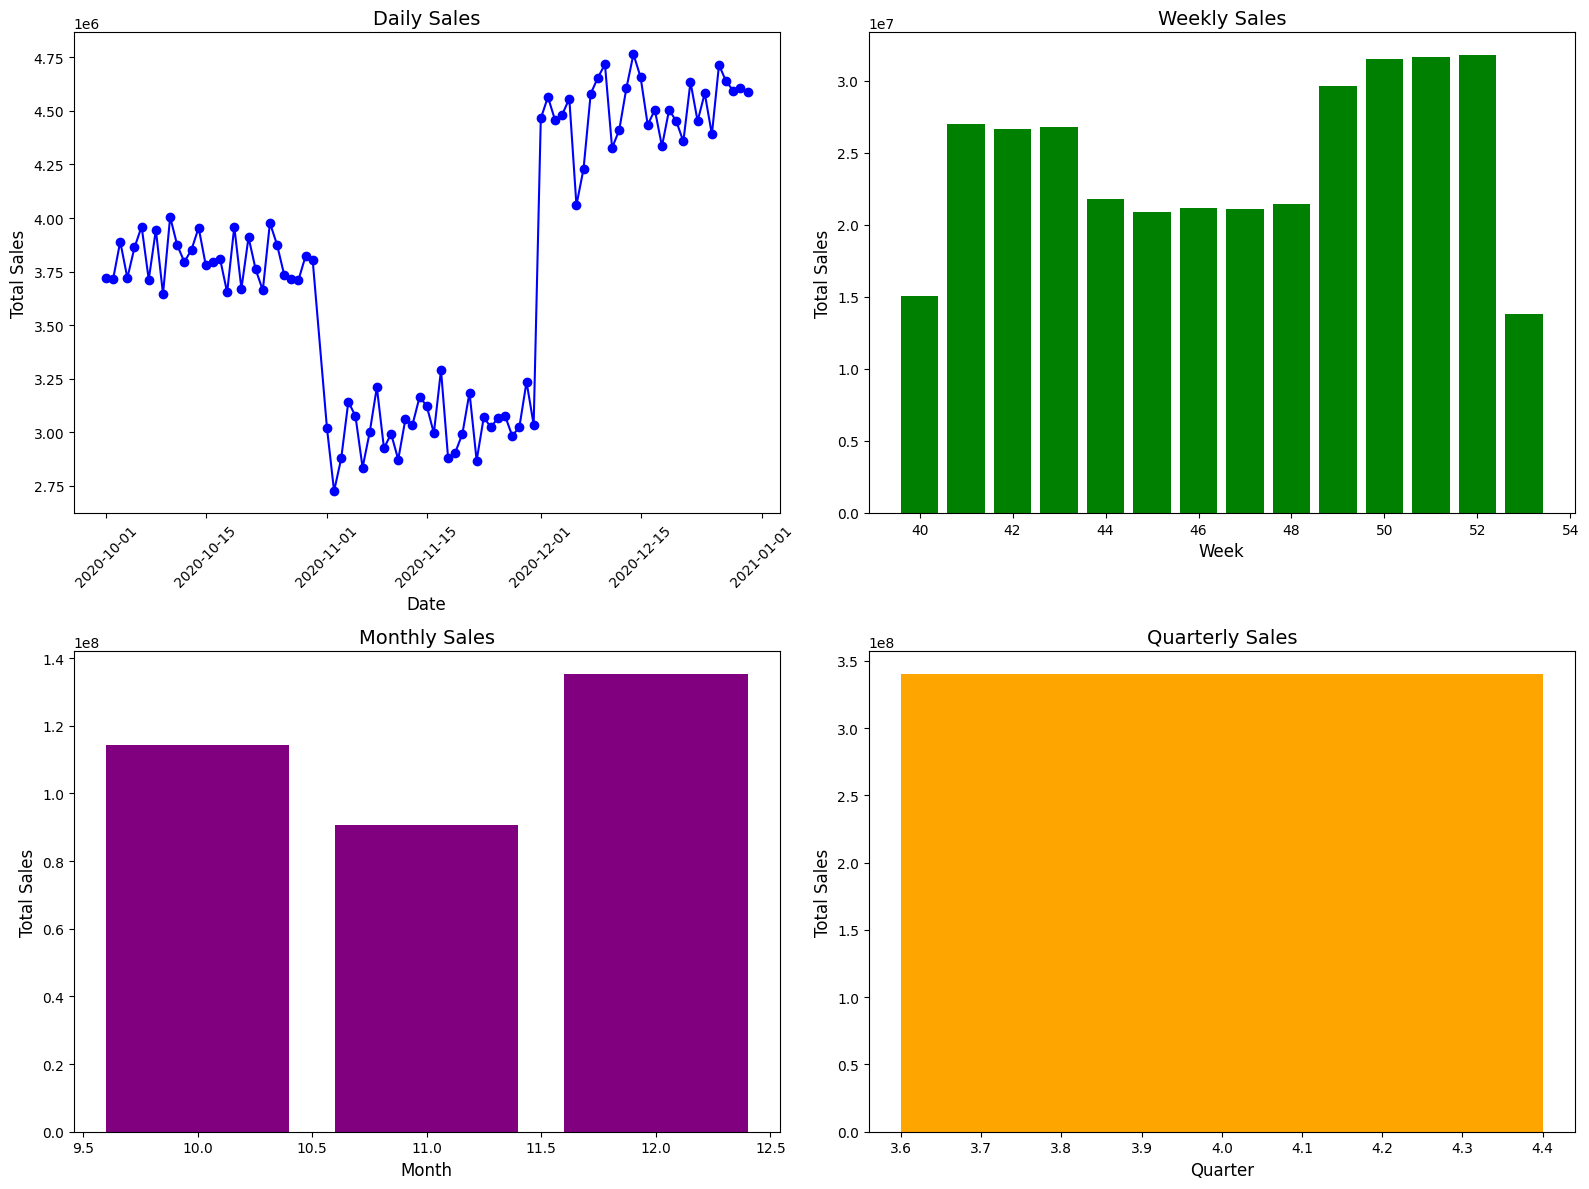

In [ ]:








import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



# Create subplots for the dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Daily Sales", "Weekly Sales", "Monthly Sales", "Quarterly Sales")
)

# Daily Sales Line Chart
fig.add_trace(
    go.Scatter(x=daily_sales['Day'], y=daily_sales['Sales'], mode='lines+markers', name='Daily Sales'),
    row=1, col=1
)

# Weekly Sales Bar Chart
fig.add_trace(
    go.Bar(x=weekly_sales['Week'], y=weekly_sales['Sales'], name='Weekly Sales'),
    row=1, col=2
)

# Monthly Sales Bar Chart
fig.add_trace(
    go.Bar(x=monthly_sales['Month'], y=monthly_sales['Sales'], name='Monthly Sales'),
    row=2, col=1
)

# Quarterly Sales Bar Chart
fig.add_trace(
    go.Bar(x=quarterly_sales['Quarter'], y=quarterly_sales['Sales'], name='Quarterly Sales'),
    row=2, col=2
)

# Update layout
fig.update_layout(
    title_text="Sales Dashboard: Daily, Weekly, Monthly, and Quarterly",
    height=800, width=1000,
    showlegend=False
)

# Show the dashboard
fig.show()



